In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Loading data
data = pd.read_csv("chatgpt-reddit-comments.csv", index_col='Unnamed: 0')
data.head()

,comment_id,comment_parent_id,comment_body,subreddit
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


In [3]:
#Checking data shape
data.shape

(52416, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 0 to 
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment_id         52415 non-null  object
 1   comment_parent_id  52415 non-null  object
 2   comment_body       52415 non-null  object
 3   subreddit          52415 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


In [5]:
data.isnull().sum()

comment_id           1
comment_parent_id    1
comment_body         1
subreddit            1
dtype: int64

In [6]:
data.dropna(inplace = True)
data.isna().sum()

comment_id           0
comment_parent_id    0
comment_body         0
subreddit            0
dtype: int64

In [7]:
subreddit_count = data['subreddit'].value_counts()
subreddit_count

r/ChatGPT            29711
r/technology         16672
r/Futurology          5009
r/dataisbeautiful     1020
subreddit                3
Name: subreddit, dtype: int64

In [8]:
data['comment_parent_id'].value_counts()

t3_107vs7i    239
t3_109g9gf    223
t3_10mias6    216
t3_10heg9p    208
t3_ztd950     202
             ... 
t1_j59syw8      1
t1_j59o2s4      1
t1_j59y2i8      1
t1_j5dhf8u      1
t1_j5m6aj0      1
Name: comment_parent_id, Length: 22596, dtype: int64

Text(0.5, 1.0, 'Comment Frequency by Subreddits')

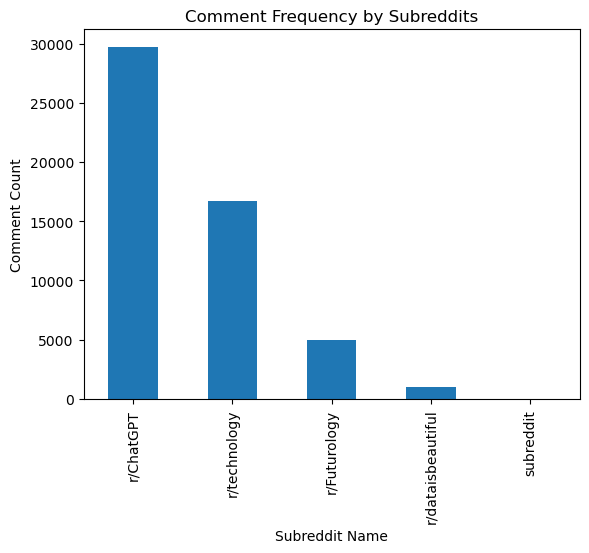

In [9]:
subreddit_count.plot(kind='bar')
plt.xlabel("Subreddit Name")
plt.ylabel("Comment Count")
plt.title("Comment Frequency by Subreddits")

In [10]:
data.comment_body[0]

"I've been shocked for days now, I don't need clickbait."

In [11]:
sid = SentimentIntensityAnalyzer()

In [12]:
data['scores'] = data['comment_body'].apply(lambda comment_body: sid.polarity_scores(comment_body))
data.head()

,comment_id,comment_parent_id,comment_body,subreddit,scores
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT,"{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'comp..."
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,"{'neg': 0.201, 'neu': 0.734, 'pos': 0.065, 'co..."
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT,"{'neg': 0.151, 'neu': 0.725, 'pos': 0.124, 'co..."
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,"{'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'comp..."


In [13]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head()

,comment_id,comment_parent_id,comment_body,subreddit,scores,compound
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT,"{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'comp...",-0.3182
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,"{'neg': 0.201, 'neu': 0.734, 'pos': 0.065, 'co...",-0.9837
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT,"{'neg': 0.151, 'neu': 0.725, 'pos': 0.124, 'co...",-0.2001
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,"{'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'comp...",-0.4364


In [14]:
# Function to label the sentiment according to score
def get_tag(val):
    if val <= -0.50:
        return 'Negative'
    elif val >= 0.5:
        return 'Positive'
    else:
        return 'Neutral'

In [15]:
data['Sentiment'] = data['compound'].apply(get_tag)
data.head()

,comment_id,comment_parent_id,comment_body,subreddit,scores,compound,Sentiment
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT,"{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'comp...",-0.3182,Neutral
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,"{'neg': 0.201, 'neu': 0.734, 'pos': 0.065, 'co...",-0.9837,Negative
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT,"{'neg': 0.151, 'neu': 0.725, 'pos': 0.124, 'co...",-0.2001,Neutral
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,"{'neg': 0.207, 'neu': 0.793, 'pos': 0.0, 'comp...",-0.4364,Neutral


In [16]:
data.drop(['scores', 'compound'], axis=1, inplace=True)

In [17]:
data.head(10)

,comment_id,comment_parent_id,comment_body,subreddit,Sentiment
0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT,Neutral
1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT,Negative
2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT,Neutral
3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT,Neutral
4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT,Neutral
5,izw8iw3,t3_zj2aeu,"Wow, way to discover the most basic functional...",r/ChatGPT,Positive
6,izvxxi8,t3_zj2aeu,"People on Reddit seek the karma and the fame,\...",r/ChatGPT,Positive
7,izwe6c7,t3_zj2aeu,Inception)),r/ChatGPT,Neutral
8,iztipoe,t3_zj2aeu,What's the point of even trying to click-bait ...,r/ChatGPT,Neutral
9,izvxsd9,t3_zj2aeu,I love you.,r/ChatGPT,Positive


In [18]:
data.to_csv('Labeled Data.csv')